Try using Keras to do the mnist competition:  
https://www.kaggle.com/c/digit-recognizer

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
print('Shape of training set: {}'.format(train.shape))
print('Shpae of test set: {}'.format(test.shape))

Shape of training set: (42000, 785)
Shpae of test set: (28000, 784)


In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So we know the first column of the training set is the label.

In [9]:
na_value = train.isnull().sum()
na_value[na_value != 0]

Series([], dtype: int64)

And there isn't any NA in the training set.  
Now we try to visulize the data since we already know that it is about digit.  
In order to doing so, we need to change the data in to a picture.

In [12]:
train_set = np.array(train.iloc[:,1:].values)
train_set.shape

(42000, 784)

In [13]:
test_set = np.array(test.values)
test_set.shape

(28000, 784)

In [18]:
import matplotlib.pyplot as plt

In [21]:
image33 = train_set[33,:].reshape(28,28)

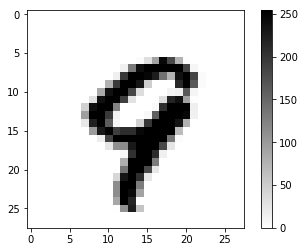

label:  9


In [24]:
plt.figure()
plt.imshow(image33, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
print('label: ',train.label[33])

Try to see more digits:

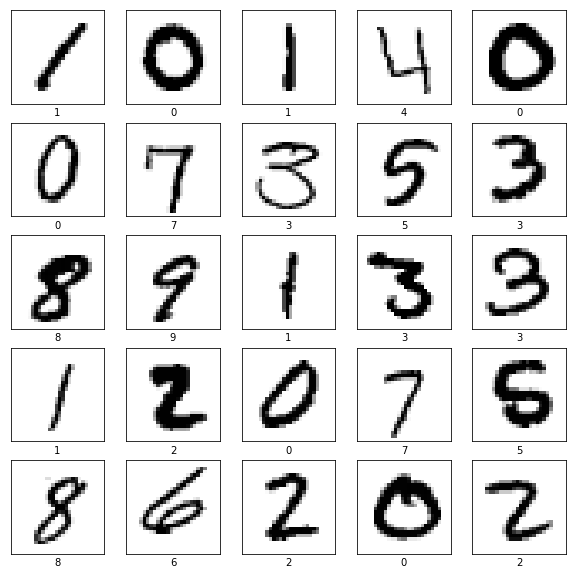

In [25]:
plt.figure(figsize=(10,10))
i = 0
for pic in range(25):
    image = train_set[pic,:].reshape(28,28)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(train.label[pic])
    i += 1
plt.show()

Simply normalize and reshape the data sets.

In [26]:
train_set = train_set/255.0
test_set = test_set/255.0

In [27]:
train_set = train_set.reshape(-1,28,28,1)
test_set = test_set.reshape(-1,28,28,1)

In [70]:
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D
from keras.optimizers import RMSprop, adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [67]:
labels = to_categorical(train.label, num_classes = 10)

This time, we separate a validation set.

In [80]:
random_seed = 1024

X_train, X_val, Y_train, Y_val = train_test_split(train_set, train.label, test_size = 0.1, random_state=random_seed)

Define the model:

In [81]:
import tensorflow as tf

cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation = "relu"))
cnn_model.add(Dense(10,  activation=tf.nn.softmax))

In [82]:
cnn_model.compile(optimizer = 'adam',
                  loss = "sparse_categorical_crossentropy",
                  metrics=["accuracy"])

In [89]:
cnn_model.fit(X_train, Y_train, batch_size = 64, epochs = 2, 
          validation_data = (X_val, Y_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/2
 - 9s - loss: 0.0325 - acc: 0.9897 - val_loss: 0.0382 - val_acc: 0.9893
Epoch 2/2
 - 8s - loss: 0.0216 - acc: 0.9933 - val_loss: 0.0442 - val_acc: 0.9855


In [100]:
pred1 = cnn_model.predict(test_set)

In [101]:
pred1_classes = np.argmax(pred1,axis = 1) 

In [102]:
pred1_classes

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [104]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we know the ImageId is actually 0 to 28000

In [105]:
results = pd.Series(pred1_classes,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_model.csv",index=False)

Try to upload the result.

In [106]:
from IPython.display import Image

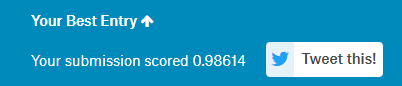

In [108]:
Image("result1.png")

It is actually a really simple CNN, and the score is pretty good since we haven't applied any further technique, such as data augmentation.